# Diabetes Database || Linear Regression || Logistic Regression || Decision Tree

I will try to predict whether a patient has diabetes or not using Linear Regression,Logistic Regression & Decision Tree and see which model gives the best result. I have a previous notebook on EDA and data preprocessing so I won't go into much details in this notebook.

Previous notebook: https://www.kaggle.com/code/azratuni/diabetes-database-eda

**Contents:**
1. Import necessary libraries and load the dataset
2. Handling columns with "0" values
3. Linear Regression
4. Logistic Regression
5. Decision Tree
6. Performance comparison of different algorithms

# 1. Import necessary libraries and load the dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.simplefilter("ignore")

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
df = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 2. Handling columns with "0" values

In [3]:
df.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
print((df[df.columns] == 0).sum())


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [6]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [7]:
df['Glucose'].fillna(df['Glucose'].median(), inplace =True)

df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace =True)

df['BMI'].fillna(df['BMI'].median(), inplace =True)

In [8]:
by_Glucose_Age_Insulin_Grp = df.groupby(['Glucose'])

def fill_Insulin(series):
    return series.fillna(series.median())
df['Insulin'] = by_Glucose_Age_Insulin_Grp['Insulin'].transform(fill_Insulin)

In [9]:
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())

In [10]:
by_BMI_Insulin = df.groupby(['BMI'])

def fill_Skinthickness(series):
    return series.fillna(series.mean())
df['SkinThickness'] = by_BMI_Insulin['SkinThickness'].transform(fill_Skinthickness)

In [11]:
df['SkinThickness'].fillna(df['SkinThickness'].mean(),inplace= True)

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Linear Regression

In [13]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
        'BMI', 'DiabetesPedigreeFunction', 'Age']]

y = df[['Outcome']]

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
print(model.coef_)

[[ 3.12482216e-02  6.40592755e-03 -1.20551916e-03 -4.23549552e-04
  -2.59872833e-04  1.44966469e-02  2.23128737e-01 -4.40433808e-06]]


In [16]:
print(model.intercept_)

[-0.97004543]


In [17]:
predictions = model.predict(x_test)

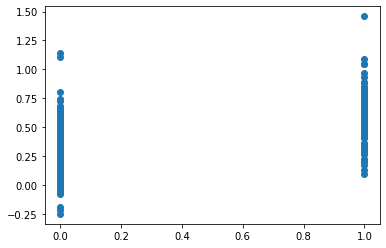

In [18]:
plt.scatter(y_test, predictions)

(array([ 2.,  3., 16., 37., 65., 38., 20., 23., 16., 11.]),
 array([-1.14285399, -0.93837495, -0.73389592, -0.52941688, -0.32493785,
        -0.12045881,  0.08402022,  0.28849926,  0.49297829,  0.69745733,
         0.90193636]),
 <BarContainer object of 10 artists>)

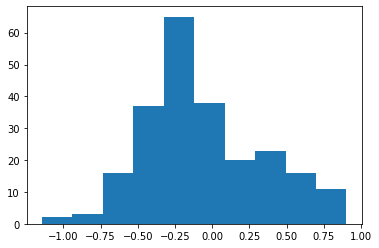

In [19]:
plt.hist(y_test - predictions)

In [20]:
#Mean Absolute Error (MAE)
from sklearn import metrics
mae(y_test, predictions)

0.32727306304303627

In [21]:
#Mean Squared Error (MSE)
mean_squared_error(y_test, predictions)

0.15468526736491772

In [22]:
y_pred = model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : ',RMSE) # RMSE : Root Mean Square Error

RMSE :  0.3933004797415301


# 4. Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(x_train, y_train)
print(model.coef_)

[[ 2.10489705e-01  2.69813479e-02 -3.64562988e-02 -9.58299955e-04
  -1.76669137e-04  3.36751430e-02  2.19562755e+00 -1.08437837e-02]]


In [24]:
print(model.intercept_)

[-3.73750607]


In [25]:
predictions = model.predict(x_test)

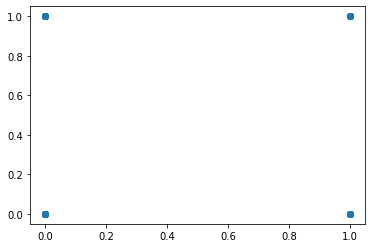

In [26]:
plt.scatter(y_test, predictions)

In [27]:
#Mean Absolute Error (MAE)

mae(y_test, predictions)

0.2597402597402597

In [28]:
#Mean Squared Error (MSE)
mean_squared_error(y_test, predictions)

0.2597402597402597

In [29]:
y_pred = model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : ',RMSE) # RMSE : Root Mean Square Error

RMSE :  0.5096471914376255


# 5. Decision Tree


In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [31]:
predictions = model.predict(x_test)

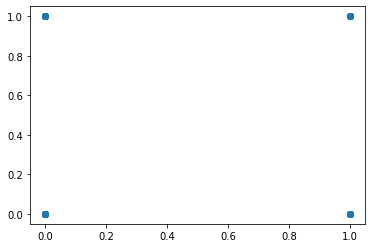

In [32]:
plt.scatter(y_test, predictions)

In [33]:
#Mean Absolute Error (MAE)

mae(y_test, predictions)

0.2727272727272727

In [34]:
#Mean Squared Error (MSE)
mean_squared_error(y_test, predictions)

0.2727272727272727

In [35]:
y_pred = model.predict(x_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE : ',RMSE) # RMSE : Root Mean Square Error

RMSE :  0.5222329678670935


# 6. Performance comparison of different algorithms

The table below shows the MAE and MSE values for each algorithm used above.

| Algorithm | MAE | MSE | RMSE |
| --- | --- | --- | --- |
| Linear Regression | 0.3289444112799123 | 0.15596593050244253 | 0.39492522140582836 |
| Logistic Regression | 0.26406926406926406 | 0.26406926406926406 | 0.513876701232177 |
| Decision Tree | 0.27705627705627706 | 0.27705627705627706 | 0.5263613559678152 |


We know that, both the MAE and RMSE can range from 0 to ∞. They are negatively-oriented scores: Lower values are better.[[Source](http://www.eumetrain.org/data/4/451/english/msg/ver_cont_var/uos3/uos3_ko1.htm#:~:text=Both%20the%20MAE%20and%20RMSE%20can%20range%20from%200%20to%20%E2%88%9E.%20They%20are%20negatively%2Doriented%20scores%3A%20Lower%20values%20are%20better.)]
For MSE as well, the lower the value the better and 0 means the model is perfect. 

### **In the table above, we can see that Logistic Regression has the lowest MAE, MSE and RMSE values. Which means, out of the 3 algorithms used, Logistic Regression gives the best results, followed by Decision Tree. Linear Regression has the highest error measures because it's a regression algorithm while the problem is a classification problem.**